In [2]:
import numpy as np              
import os    
import csv                  
import pandas as pd             
import matplotlib               
import matplotlib.pyplot as plt 
import scipy
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.cluster import KMeans

mat = scipy.io.loadmat('C:Downloads/ec014_333_spksort_samp.mat')

data = mat.get('X')

In [3]:
X_train0 = np.transpose (data)

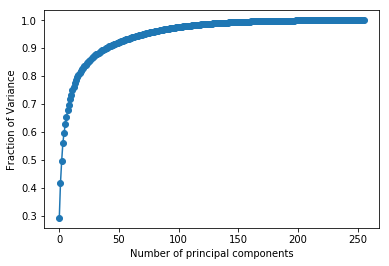

72 components of the total 256 components account for 95% of variance


In [4]:
#---------------------------------------------------------------------------------------------
# Principal Component Analysis of the MNIST dataset
#---------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA

# create the principal components of the training data
pcaval = PCA()
pcaval.fit(X_train0)
scores = pcaval.transform(X_train0)

# compute how much variance is explained by each component
CUMSUM = np.cumsum(pcaval.explained_variance_ratio_)

plt.plot(range(0,256), CUMSUM, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of Variance')
plt.show()

# print out how many components explain at least 95% of the variance
dmax = np.argmax(CUMSUM >= 0.95) + 1
print(dmax,"components of the total", pcaval.explained_variance_ratio_.size, "components account for 95% of variance")

In [6]:
clf = KMeans(n_clusters=5)
clf.fit(X_train0)
Y9_pred = clf.predict(X_train0)

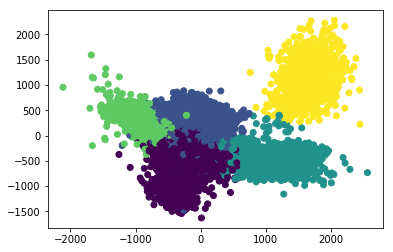

In [7]:
plt.scatter(scores[:,0], scores[:,1], c=Y9_pred)
plt.show()

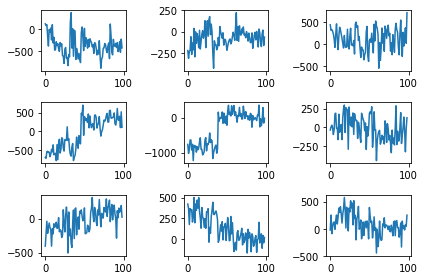

In [10]:
i=1
while i < 10:
    plt.subplot(3,3,i)
    plt.plot(scores[1:100,i-1])
    i = i+1
plt.tight_layout()
plt.show()